# 파이토치를 이용한 머신러닝

간단한 분류 알고리즘 훈련
  - 인공뉴런
  - 퍼셉트론
  - 적응형 선형 뉴런, 학습

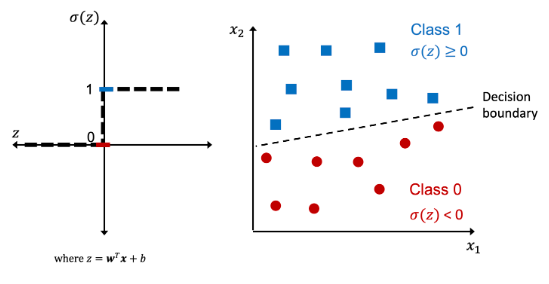

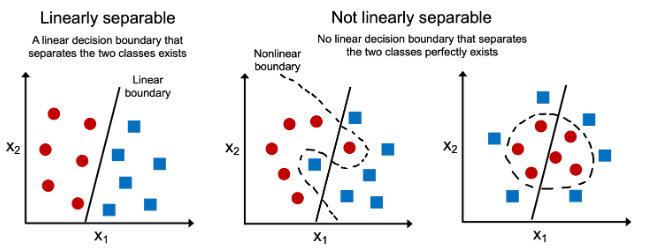

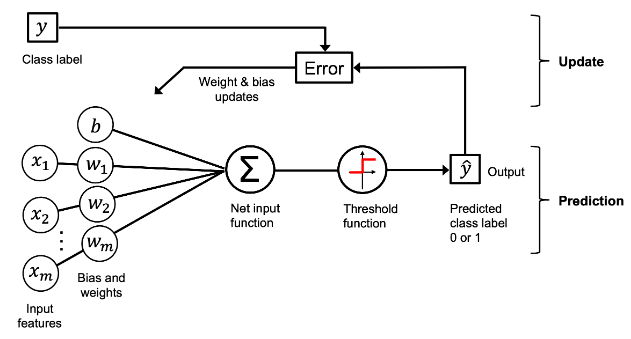

In [4]:
import numpy as np
class Perceptron:
  def __init__(self, eta=0.01, epochs=50, random_state = 1):  # eta 학습률(0.0 ~ 0.1) epochs 반복횟수
    self.eta = eta
    self.epochs = epochs
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)  # 랜덤생성기 가중치를 무작위로 초기화
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # 가중치 초기화
    self.b_ = np.float_(0.)  # 절편 즉 바이어스 초기화
    self.errors_ = [] # 학습과정에서 발생하는 오류를 저장
    for _ in range(self.epochs):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))  # 학습률*오차 의 값으로 업데이트 양을 결정
        self.w_ += update * xi   # 오차를 줄여주는 역활
        self.b_ += update        # 입력데이터와는 무관하게 예측을 조정
        errors += int(update != 0.0)  # 모델이 틀린 예측을 했을대 오류수를 증가
      self.errors_.append(errors)  # 각 에포크마다 오류수를 저장해서 학습과정 추적
    return self  # 객체 자신을 반환해서 메소드체인 기법을가능하게

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_  # 가중치
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)  # 0보다 크면 1 작으면 0

In [3]:
# 두개의 벡터사이의 각도를 계산 - 코사인 법칙
# v1 = np.array([1,2,3])
# v2 = 0.5*v1
# # 벡터의 내적
# v1.dot(v2)
# # 벡터의 노름(크기) 계산
# print(np.linalg.norm(v1))
# print(np.linalg.norm(v2))

3.7416573867739413
1.8708286933869707


In [21]:
# iris data로 분류 훈련
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


산점도로 데이터 분포 그리기

In [8]:
import matplotlib.pyplot as plt
import numpy as np

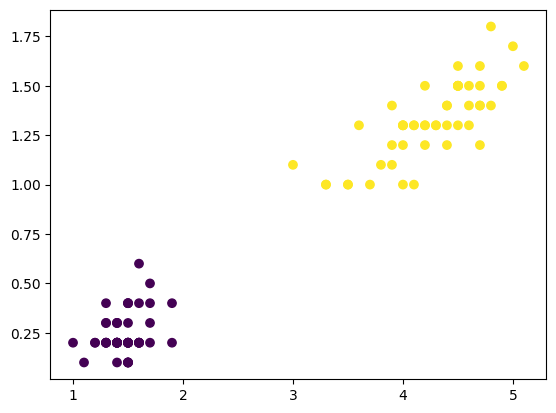

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# 퍼셉트론은 이진분류 2개품종을 사용  setosa, versicolor
df = pd.concat([X,y], axis=1)
df = df[df['class'] != 'Iris-virginica']
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = LabelEncoder().fit_transform(df['class']) )
plt.show()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


퍼셉트론 모델 훈련

(100, 2) (100,)


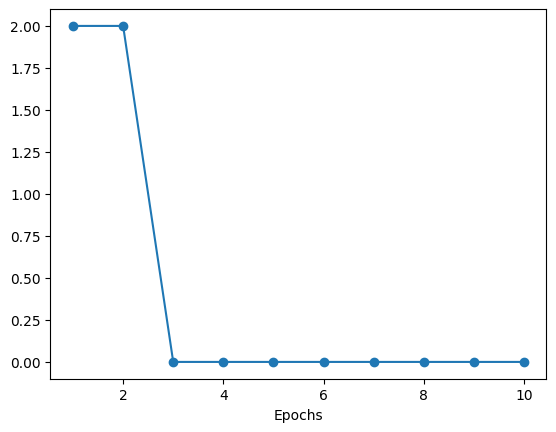

In [45]:
# 데이터 분류
X = df.iloc[:,[2,3]].to_numpy()
y = df.iloc[:,-1].to_numpy()
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape)
model = Perceptron(eta=0.1, epochs=10)
model.fit(X, y)
# # 모델이 에포크만큼 학습을 하면서 에러값을 저장

plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.show()